In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
from google.colab import files
uploaded = files.upload()

In [ ]:
purchase=pd.read_csv('QVI_purchase_behaviour.csv')                      #Loading of csv file into dataframe
transaction=pd.read_excel('QVI_transaction_data.xlsx')

In [ ]:
transaction.head(10)                               #Examine of transaction dataset

In [ ]:
transaction.info()             #checking datatypes in dataset

In [ ]:
excel_epoch = pd.to_datetime("1899-12-30")                                                  #converting date datype from int to datetime
transaction['DATE'] = excel_epoch + pd.to_timedelta(transaction['DATE'], unit='D')
transaction.head(10)

In [ ]:
transaction.info()

In [ ]:
transaction.sort_values(by=['TXN_ID'],inplace=True,ascending=True)
transaction.head(10)

In [ ]:
transaction.shape                              #records and fields in dataset

In [136]:
transaction['TXN_ID'].nunique()                                    #Unique values based on TXN_ID

263127

In [137]:
transaction.duplicated(subset='TXN_ID', keep=False).sum() #checking of duplicated values in dataset

np.int64(3411)

In [138]:
transaction.drop_duplicates(subset='TXN_ID', keep='first',inplace=True)   #dropping duplicated values in dataset

In [139]:
transaction.duplicated(subset='TXN_ID', keep=False).sum()

np.int64(0)

In [140]:
transaction.isnull().sum()                  #checking for null values in dataset

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0


In [141]:
transaction['Price']=transaction['TOT_SALES']/transaction['PROD_QTY']                #defining new parameter price; price=tot_sales/prod_qty

In [142]:
transaction.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'Price'],
      dtype='object')

In [143]:
from scipy import stats                                                         ####outlier detection
transaction['zscore_p']=stats.zscore(transaction['PROD_QTY'])                   #z score calulation of quantity for possible outlier
transaction[abs(transaction['zscore_p'])>3]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Price,zscore_p
258557,2019-05-14,1,1289,329,96,WW Original Stacked Chips 160g,4,7.6,1.90,3.242635
258558,2018-08-14,1,1460,539,19,Smiths Crinkle Cut Snag&Sauce 150g,4,10.4,2.60,3.242635
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,3.00,4.791942
184870,2019-05-14,3,3015,1168,78,Thins Chips Salt & Vinegar 175g,5,6.6,1.32,4.791942
216898,2019-05-20,3,3025,1207,99,Pringles Sthrn FriedChicken 134g,5,7.4,1.48,4.791942
...,...,...,...,...,...,...,...,...,...,...
185533,2018-08-15,270,270127,267461,46,Kettle Original 175g,5,27.0,5.40,4.791942
217333,2019-05-18,270,270138,267536,87,Infuzions BBQ Rib Prawn Crackers 110g,5,19.0,3.80,4.791942
81359,2019-05-16,270,270142,267562,78,Thins Chips Salt & Vinegar 175g,4,13.2,3.30,3.242635
55696,2018-08-16,271,271170,269226,48,Red Rock Deli Sp Salt & Truffle 150G,4,10.8,2.70,3.242635


In [144]:
transaction['zscore_t']=stats.zscore(transaction['TOT_SALES'])                               #z score calulation of total sales for possible outlier
transaction[abs(transaction['zscore_t'])>3]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Price,zscore_p,zscore_t
184876,2019-05-16,4,4347,4220,14,Smiths Crnkle Chip Orgnl Big Bag 380g,3,17.7,5.9,1.693328,3.367236
216903,2018-08-20,5,5063,4742,30,Doritos Corn Chips Cheese Supreme 170g,5,22.0,4.4,4.791942,4.760058
69436,2019-05-15,5,5065,4756,15,Twisties Cheese 270g,4,18.4,4.6,3.242635,3.593975
32052,2018-08-16,7,7124,6772,15,Twisties Cheese 270g,4,18.4,4.6,3.242635,3.593975
150330,2019-05-17,8,8153,8021,50,Tostitos Lightly Salted 175g,4,17.6,4.4,3.242635,3.334845
...,...,...,...,...,...,...,...,...,...,...,...
69828,2019-05-15,269,269093,265563,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,5,23.0,4.6,4.791942,5.083970
200,2019-05-19,269,269221,266380,62,Pringles Mystery Flavour 134g,5,18.5,3.7,4.791942,3.626366
185533,2018-08-15,270,270127,267461,46,Kettle Original 175g,5,27.0,5.4,4.791942,6.379618
217333,2019-05-18,270,270138,267536,87,Infuzions BBQ Rib Prawn Crackers 110g,5,19.0,3.8,4.791942,3.788322


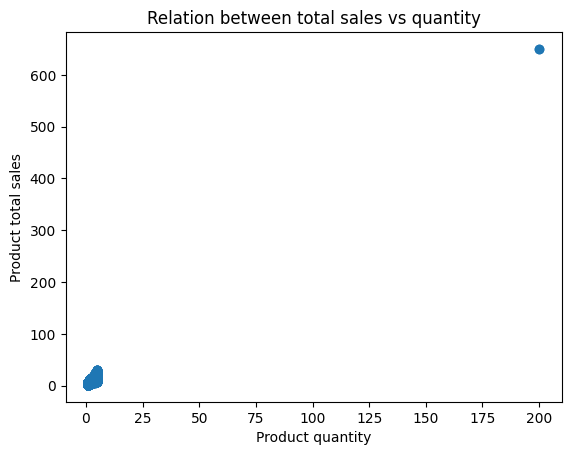

In [145]:
plt.scatter(transaction['PROD_QTY'],transaction['TOT_SALES'])
plt.xlabel('Product quantity')
plt.ylabel('Product total sales')
plt.title("Relation between total sales vs quantity")            #Scatter plot to look for outlier
plt.show()

From scatter plot it is clear that product quantity and sales are under 25 and 100 respectively. Rest are outlier


In [146]:
transaction=transaction.loc[((transaction['PROD_QTY']<25) & (transaction['TOT_SALES']<100))]
transaction.drop(columns=['zscore_p','zscore_t'],inplace=True)

<ipython-input-146-2890446557>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction.drop(columns=['zscore_p','zscore_t'],inplace=True)


In [147]:
transaction.describe()                #statical check to rule out outliers

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,Price
count,263125,263125.000000,2.631250e+05,2.631250e+05,263125.000000,263125.000000,263125.000000,263125.000000
mean,2018-12-30 00:41:55.902327808,135.079981,1.355515e+05,1.351587e+05,56.579884,1.905535,7.299585,3.825233
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000,1.320000
25%,2018-09-30 00:00:00,70.000000,7.001800e+04,6.758400e+04,28.000000,2.000000,5.400000,3.000000
50%,2018-12-30 00:00:00,130.000000,1.303580e+05,1.351420e+05,56.000000,2.000000,7.400000,3.800000
75%,2019-03-31 00:00:00,203.000000,2.031000e+05,2.027240e+05,85.000000,2.000000,9.200000,4.600000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,6.500000
std,NaN,76.799075,8.061826e+04,7.814891e+04,32.824179,0.344005,2.528163,1.109309


In [148]:
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Price
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,3.0
238495,2018-09-16,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,2.7
185542,2019-03-07,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,3.6
185543,2019-03-08,1,1003,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,3.0
99838,2018-11-02,1,1004,5,96,WW Original Stacked Chips 160g,1,1.9,1.9
...,...,...,...,...,...,...,...,...,...
25107,2018-09-26,272,272392,270206,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,4.2
25108,2018-09-29,272,272392,270207,75,Cobs Popd Sea Salt Chips 110g,2,7.6,3.8
25109,2018-10-31,272,272392,270208,81,Pringles Original Crisps 134g,2,7.4,3.7
25110,2019-02-17,272,272392,270209,78,Thins Chips Salt & Vinegar 175g,2,6.6,3.3


In [149]:
purchase.head(10)         #Examine Purchase dataset

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [150]:
purchase.shape         #records and fields in dataset

(72637, 3)

In [151]:
purchase.info()           #check for datatypte

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [152]:
purchase['LYLTY_CARD_NBR'].nunique()

72637

In [153]:
purchase.duplicated(subset='LYLTY_CARD_NBR', keep=False).sum()            #duplicated value check

np.int64(0)

In [154]:
purchase.isnull().sum()             #null value check

,0
LYLTY_CARD_NBR,0
LIFESTAGE,0
PREMIUM_CUSTOMER,0


In [155]:
purchase.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

Merging of purchase and trasaction dataset

In [156]:
transaction=transaction.merge(purchase,how='left',on='LYLTY_CARD_NBR')               # merging of dataset

In [157]:
transaction.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'Price', 'LIFESTAGE',
       'PREMIUM_CUSTOMER'],
      dtype='object')

In [158]:
transaction['LIFESTAGE'].unique()                       #unique records in lifestage column

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [189]:
transaction['LIFESTAGE'].value_counts()                  #count of unique records in lifestage column

,count
LIFESTAGE,
OLDER SINGLES/COUPLES,54147
RETIREES,49512
OLDER FAMILIES,48124
YOUNG FAMILIES,43242
YOUNG SINGLES/COUPLES,36255
MIDAGE SINGLES/COUPLES,24949
NEW FAMILIES,6896


In [188]:
transaction['PREMIUM_CUSTOMER'].unique()                #unique records in premium customer column

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [190]:
transaction['PREMIUM_CUSTOMER'].value_counts()           #count of unique records in premium customer column

,count
PREMIUM_CUSTOMER,
Mainstream,101382
Budget,92512
Premium,69231


Analysis of dataset

In [206]:
customer_lifestage=transaction.groupby(by=['LIFESTAGE'],as_index=False).agg(unique_customer=pd.NamedAgg(column='LYLTY_CARD_NBR', aggfunc='nunique'))
purchase_lifestage=transaction.groupby(by=['LIFESTAGE','LYLTY_CARD_NBR'],as_index=False).agg(customer=pd.NamedAgg(column='TXN_ID', aggfunc='count'))
one_purchase_lifestage=purchase_lifestage[purchase_lifestage['customer']==1].groupby(by=['LIFESTAGE'],as_index=False).agg(one_time_customer=pd.NamedAgg(column='LYLTY_CARD_NBR', aggfunc='count'))
repeated_purchase_lifestage=purchase_lifestage[purchase_lifestage['customer']>1].groupby(by=['LIFESTAGE'],as_index=False).agg(multiple_time_customer=pd.NamedAgg(column='LYLTY_CARD_NBR', aggfunc='count'))
customer_lifestage=customer_lifestage.merge(one_purchase_lifestage,how='left',on='LIFESTAGE')
customer_lifestage=customer_lifestage.merge(repeated_purchase_lifestage,how='left',on='LIFESTAGE')
customer_lifestage['repeat_customer_rate']=(customer_lifestage['multiple_time_customer']*100/customer_lifestage['unique_customer']).round(0)
customer_lifestage


,LIFESTAGE,unique_customer,one_time_customer,multiple_time_customer,repeat_customer_rate
0,MIDAGE SINGLES/COUPLES,7275,1951,5324,73.0
1,NEW FAMILIES,2549,787,1762,69.0
2,OLDER FAMILIES,9779,1947,7832,80.0
3,OLDER SINGLES/COUPLES,14609,3253,11356,78.0
4,RETIREES,14805,3802,11003,74.0
5,YOUNG FAMILIES,9178,1980,7198,78.0
6,YOUNG SINGLES/COUPLES,14441,5385,9056,63.0


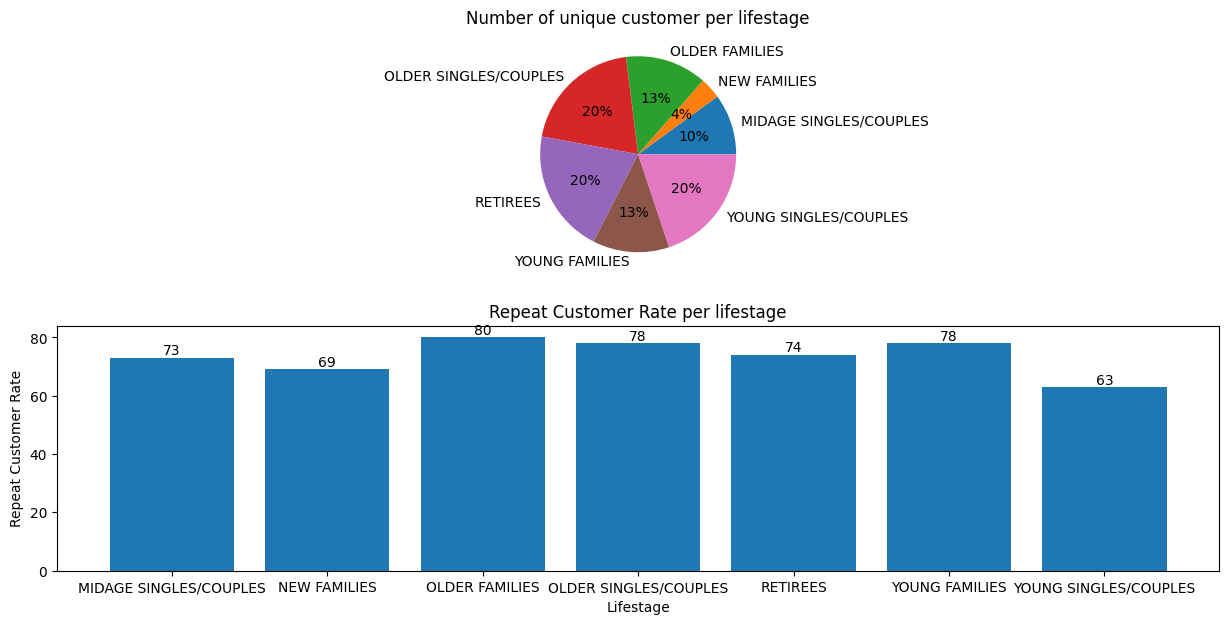

In [207]:
plt.figure(figsize=(15, 7))
plt.subplot(2,1,1)
plt.pie(customer_lifestage['unique_customer'],labels=customer_lifestage['LIFESTAGE'],autopct='%1.0f%%')
plt.title('Number of unique customer per lifestage')

plt.subplot(2,1,2)
bars = plt.bar(customer_lifestage['LIFESTAGE'],customer_lifestage['repeat_customer_rate'])
plt.title('Repeat Customer Rate per lifestage')
plt.xlabel('Lifestage')
plt.ylabel('Repeat Customer Rate')
plt.bar_label(bars)
plt.show()

Above two graph depicts percentage share of unique customer and repeat customer rate(RPR) percentage across lifestage:
*   Older singles/couples, retirees and young singles/couples have same percentage and highest share in unique customer and have RPR of 78%, 74% and 63% respectively
*   RPR of older families are highest with 80% despite having 13% unique customer



In [203]:
customer_premium=transaction.groupby(by=['PREMIUM_CUSTOMER'],as_index=False).agg(unique_customer=pd.NamedAgg(column='LYLTY_CARD_NBR', aggfunc='nunique'))
purchase_premium=transaction.groupby(by=['PREMIUM_CUSTOMER','LYLTY_CARD_NBR'],as_index=False).agg(customer=pd.NamedAgg(column='TXN_ID', aggfunc='count'))
one_purchase_premium=purchase_premium[purchase_premium['customer']==1].groupby(by=['PREMIUM_CUSTOMER'],as_index=False).agg(one_time_customer=pd.NamedAgg(column='LYLTY_CARD_NBR', aggfunc='count'))
repeated_purchase_premium=purchase_premium[purchase_premium['customer']>1].groupby(by=['PREMIUM_CUSTOMER'],as_index=False).agg(multiple_time_customer=pd.NamedAgg(column='LYLTY_CARD_NBR', aggfunc='count'))
customer_premium=customer_premium.merge(one_purchase_premium,how='left',on='PREMIUM_CUSTOMER')
customer_premium=customer_premium.merge(repeated_purchase_premium,how='left',on='PREMIUM_CUSTOMER')
customer_premium['repeat_customer_rate']=(customer_premium['multiple_time_customer']*100/customer_premium['unique_customer']).round(0)
customer_premium

,PREMIUM_CUSTOMER,unique_customer,one_time_customer,multiple_time_customer,repeat_customer_rate
0,Budget,24470,6278,18192,74.0
1,Mainstream,29245,7905,21340,73.0
2,Premium,18921,4922,13999,74.0


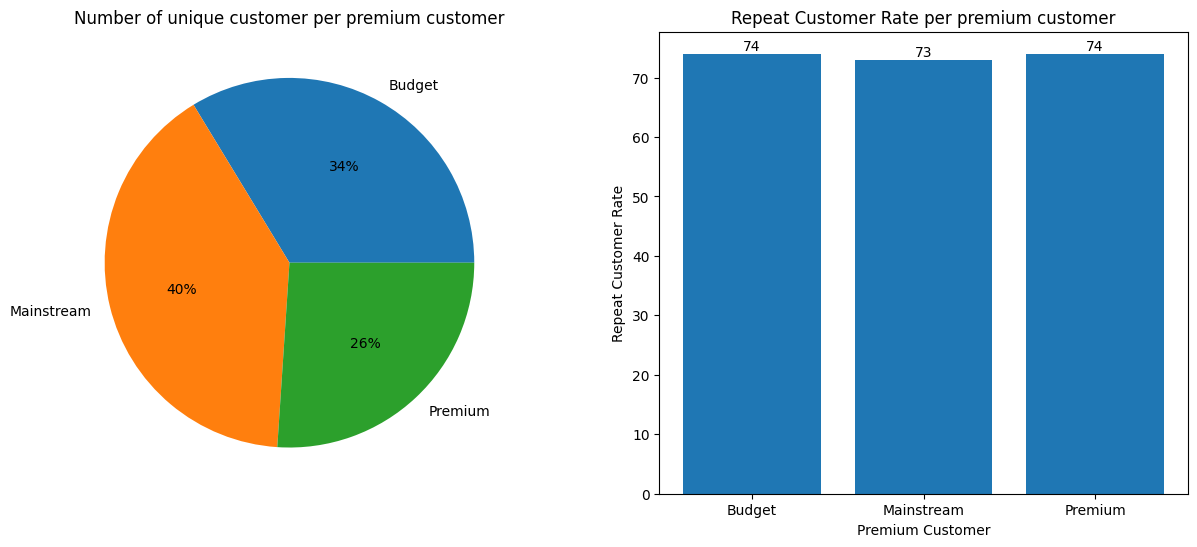

In [205]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.pie(customer_premium['unique_customer'],labels=customer_premium['PREMIUM_CUSTOMER'],autopct='%1.0f%%')
plt.title('Number of unique customer per premium customer')


plt.subplot(1,2,2)
bars=plt.bar(customer_premium['PREMIUM_CUSTOMER'],customer_premium['repeat_customer_rate'])
plt.title('Repeat Customer Rate per premium customer')
plt.xlabel('Premium Customer')
plt.ylabel('Repeat Customer Rate')
plt.bar_label(bars)
plt.show()

Above two graph depicts percentage share of unique customer and repeat customer rate(RPR) percentage across premium customer:
*   Mainstream customer has highest with 40% unique customer but has lowest RPR of 72.97%
*   RPR of across premium customer are almost similar, each having RPR greater than 72%




In [208]:
customer=transaction.groupby(by=['LIFESTAGE','PREMIUM_CUSTOMER'],as_index=False).agg(unique_customer=pd.NamedAgg(column='LYLTY_CARD_NBR', aggfunc='nunique'))
purchase=transaction.groupby(by=['LIFESTAGE','PREMIUM_CUSTOMER','LYLTY_CARD_NBR'],as_index=False).agg(customer=pd.NamedAgg(column='TXN_ID', aggfunc='count'))
one_purchase=purchase[purchase['customer']==1].groupby(by=['LIFESTAGE','PREMIUM_CUSTOMER'],as_index=False).agg(one_time_customer=pd.NamedAgg(column='LYLTY_CARD_NBR', aggfunc='count'))
repeated_purchase=purchase[purchase['customer']>1].groupby(by=['LIFESTAGE','PREMIUM_CUSTOMER'],as_index=False).agg(multiple_time_customer=pd.NamedAgg(column='LYLTY_CARD_NBR', aggfunc='count'))
customer=customer.merge(one_purchase,how='left',on=['LIFESTAGE','PREMIUM_CUSTOMER'])
customer=customer.merge(repeated_purchase,how='left',on=['LIFESTAGE','PREMIUM_CUSTOMER'])
customer['repeat_customer_rate']=(customer['multiple_time_customer']*100/customer['unique_customer']).round(0)
customer

,LIFESTAGE,PREMIUM_CUSTOMER,unique_customer,one_time_customer,multiple_time_customer,repeat_customer_rate
0,MIDAGE SINGLES/COUPLES,Budget,1504,435,1069,71.0
1,MIDAGE SINGLES/COUPLES,Mainstream,3340,809,2531,76.0
2,MIDAGE SINGLES/COUPLES,Premium,2431,707,1724,71.0
3,NEW FAMILIES,Budget,1112,370,742,67.0
4,NEW FAMILIES,Mainstream,849,258,591,70.0
5,NEW FAMILIES,Premium,588,159,429,73.0
6,OLDER FAMILIES,Budget,4675,932,3743,80.0
7,OLDER FAMILIES,Mainstream,2831,555,2276,80.0
8,OLDER FAMILIES,Premium,2273,460,1813,80.0
9,OLDER SINGLES/COUPLES,Budget,4929,1071,3858,78.0


In [166]:
customer_pivot = customer.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='unique_customer')
customer_pivot.reset_index()

PREMIUM_CUSTOMER,LIFESTAGE,Budget,Mainstream,Premium
0,MIDAGE SINGLES/COUPLES,1504,3340,2431
1,NEW FAMILIES,1112,849,588
2,OLDER FAMILIES,4675,2831,2273
3,OLDER SINGLES/COUPLES,4929,4930,4750
4,RETIREES,4454,6479,3872
5,YOUNG FAMILIES,4017,2728,2433
6,YOUNG SINGLES/COUPLES,3779,8088,2574


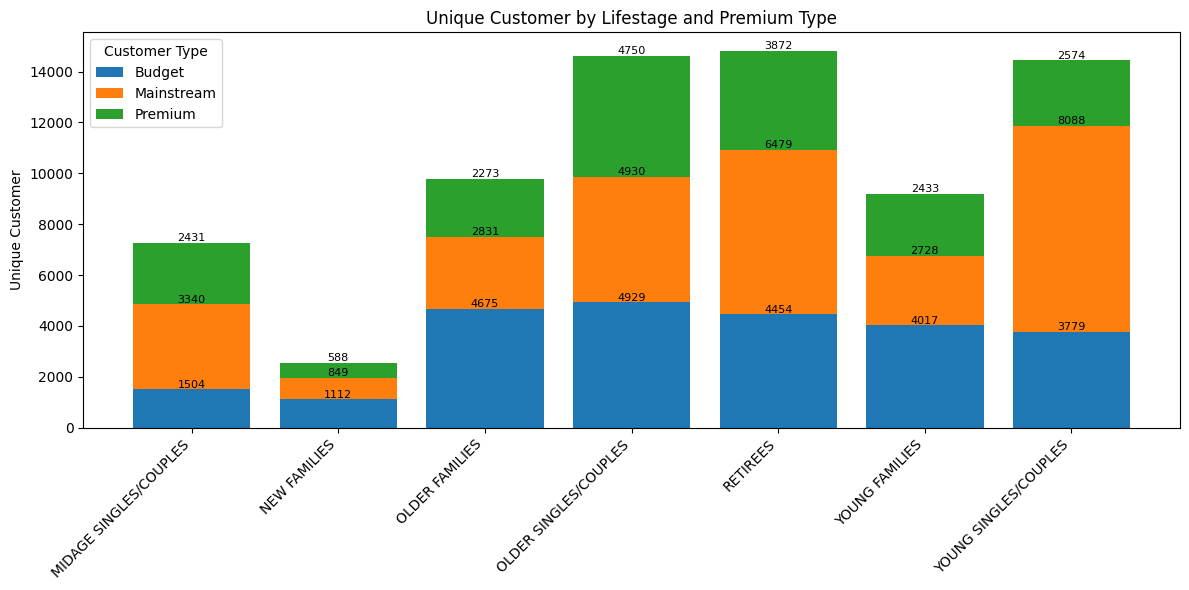

In [212]:
labels = customer_pivot.index
budget = customer_pivot['Budget']
mainstream = customer_pivot['Mainstream']
premium = customer_pivot['Premium']
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(x, budget, label='Budget')
bar2 = ax.bar(x, mainstream, bottom=budget, label='Mainstream')
bar3 = ax.bar(x, premium, bottom=budget + mainstream, label='Premium')


def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + bar.get_y() - 10,
            s=f'{height:.0f}',
            ha='center', va='bottom', fontsize=8, color='black'
        )

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)


ax.set_ylabel('Unique Customer')
ax.set_title('Unique Customer by Lifestage and Premium Type')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend(title='Customer Type')

plt.tight_layout()
plt.show()

Above is the stacked bar graph depicts the distribution of number of unique customer across lifestage and premium:
1.   In mainstream young singles/couples has highest unique customer followed by retirees and older singles/couples
2.   In budget only new families and midage singles/couples has lowest unique customer of less than 2000
3.   In premium older singles/couples and retirees have unique customer greater than 3000






In [210]:
customer_pivot_rpr = customer.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='repeat_customer_rate')
customer_pivot_rpr.reset_index()

PREMIUM_CUSTOMER,LIFESTAGE,Budget,Mainstream,Premium
0,MIDAGE SINGLES/COUPLES,71.0,76.0,71.0
1,NEW FAMILIES,67.0,70.0,73.0
2,OLDER FAMILIES,80.0,80.0,80.0
3,OLDER SINGLES/COUPLES,78.0,77.0,78.0
4,RETIREES,76.0,73.0,74.0
5,YOUNG FAMILIES,79.0,78.0,79.0
6,YOUNG SINGLES/COUPLES,60.0,65.0,60.0


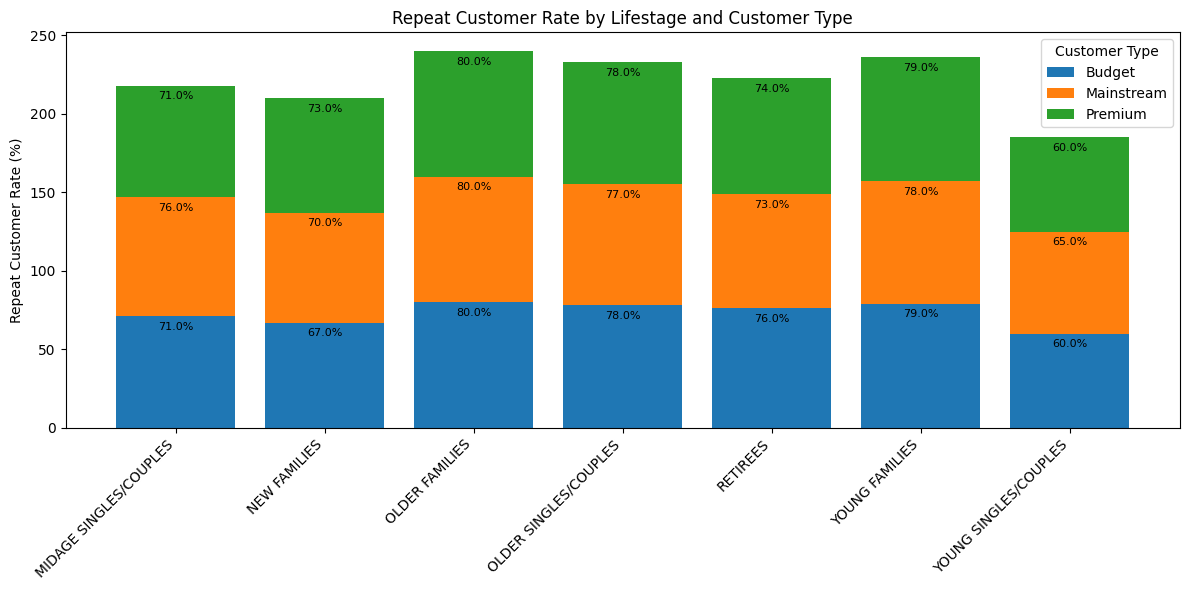

In [211]:
labels = customer_pivot_rpr.index
budget = customer_pivot_rpr['Budget']
mainstream = customer_pivot_rpr['Mainstream']
premium = customer_pivot_rpr['Premium']
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(12, 6))


bar1 = ax.bar(x, budget, label='Budget')
bar2 = ax.bar(x, mainstream, bottom=budget, label='Mainstream')
bar3 = ax.bar(x, premium, bottom=budget + mainstream, label='Premium')

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + bar.get_y() - 10,
            s=f'{height:.1f}%',
            ha='center', va='bottom', fontsize=8, color='black'
        )

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)


ax.set_ylabel('Repeat Customer Rate (%)')
ax.set_title('Repeat Customer Rate by Lifestage and Customer Type')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend(title='Customer Type')

plt.tight_layout()
plt.show()

Above is the stacked bar graph depicts the distribution of repet customer rate(RPR) across lifestage and premium:
1.   In mainstream older families has highest RPR and young singles/couples has lowest RPR
2.   All the groups have RPR greater than 60% that means on every 1000 unique customer 600 customer are repeated one


In [214]:
lifestage=transaction.groupby(by=['LIFESTAGE'],as_index=False).agg(sales=pd.NamedAgg(column='TOT_SALES', aggfunc='sum'),
                                                                   quantity=pd.NamedAgg(column='PROD_QTY', aggfunc='sum'))
lifestage=lifestage.merge(customer_lifestage,how='inner',on='LIFESTAGE')
#lifestage['sales per transaction']=(lifestage['sales']/lifestage['transaction']).round(2)
#lifestage['transaction per customer']=(lifestage['transaction']/lifestage['unique_customer']).round(2)
lifestage['quantity per customer']=(lifestage['quantity']/lifestage['unique_customer']).round(0)
lifestage.drop(columns=['multiple_time_customer','one_time_customer','repeat_customer_rate','unique_customer','quantity'],inplace=True)
lifestage

,LIFESTAGE,sales,quantity per customer
0,MIDAGE SINGLES/COUPLES,183598.85,7.0
1,NEW FAMILIES,50254.45,5.0
2,OLDER FAMILIES,349034.50,10.0
3,OLDER SINGLES/COUPLES,400006.55,7.0
4,RETIREES,364589.60,6.0
5,YOUNG FAMILIES,313662.60,9.0
6,YOUNG SINGLES/COUPLES,259556.70,5.0


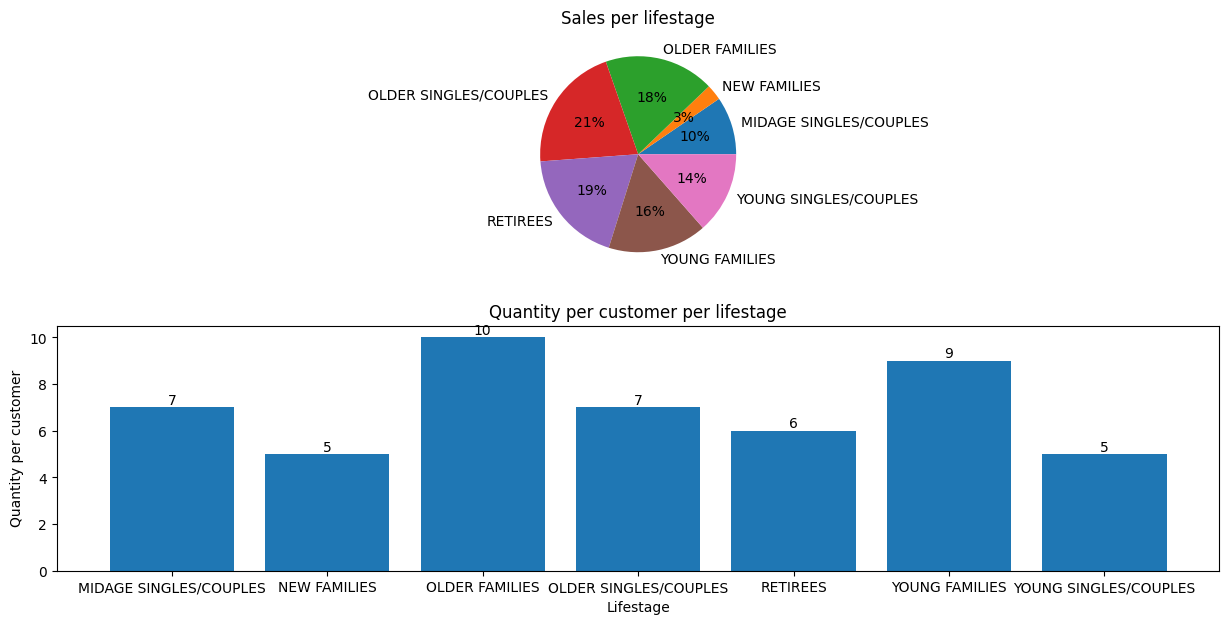

In [215]:
plt.figure(figsize=(15, 7))
plt.subplot(2,1,1)
plt.pie(lifestage['sales'],labels=lifestage['LIFESTAGE'],autopct='%1.0f%%')
plt.title('Sales per lifestage')

plt.subplot(2,1,2)
bars=plt.bar(lifestage['LIFESTAGE'],lifestage['quantity per customer'])
plt.title('Quantity per customer per lifestage')
plt.xlabel('Lifestage')
plt.ylabel('Quantity per customer')
plt.bar_label(bars)
plt.show()

Above two graph depicts percentage contribution of sales and average quantity of chips purchased by customer across lifesatge:


1.   21% and the highest sales comes from older singles/couples, and midage singles/couples and older singles/couples have same number of quantity per customer suggesting older singles/couples purchase expensive chips compared to Midage singles/couples
2.   Older families have 10 quantity per customer has third highest sales suggest that this lifestage purchase expensive chips among all




In [216]:
premium=transaction.groupby(by=['PREMIUM_CUSTOMER'],as_index=False).agg(sales=pd.NamedAgg(column='TOT_SALES', aggfunc='sum'),
                                                                             quantity=pd.NamedAgg(column='PROD_QTY', aggfunc='sum'))
premium=premium.merge(customer_premium,how='inner',on='PREMIUM_CUSTOMER')
#premium['sales per transaction']=premium['sales']/premium['transaction']
#premium['transaction per customer']=premium['transaction']/premium['unique_customer']
premium['quantity per customer']=(premium['quantity']/premium['unique_customer']).round(0)
premium.drop(columns=['multiple_time_customer','one_time_customer','repeat_customer_rate','unique_customer'],inplace=True)

premium

,PREMIUM_CUSTOMER,sales,quantity,quantity per customer
0,Budget,671523.70,176636,7.0
1,Mainstream,746313.40,192786,7.0
2,Premium,502866.15,131972,7.0


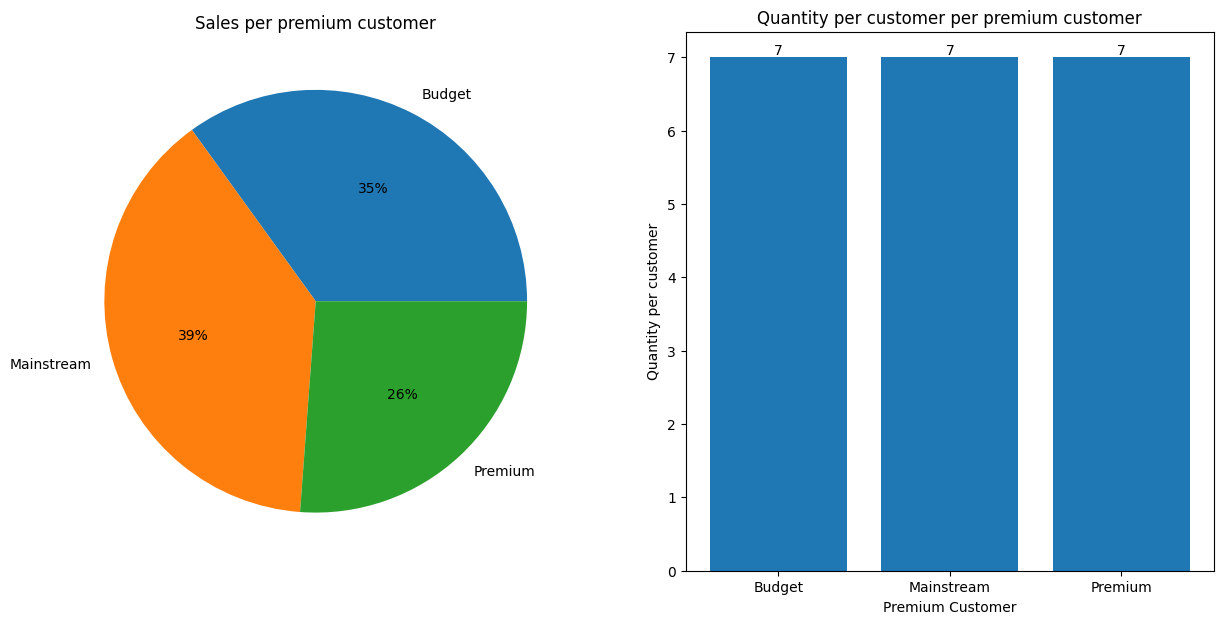

In [219]:
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plt.pie(premium['sales'],labels=premium['PREMIUM_CUSTOMER'],autopct='%1.0f%%')
plt.title('Sales per premium customer')

plt.subplot(1,2,2)
bars=plt.bar(premium['PREMIUM_CUSTOMER'],premium['quantity per customer'])
plt.title('Quantity per customer per premium customer')
plt.xlabel('Premium Customer')
plt.ylabel('Quantity per customer')
plt.bar_label(bars)
plt.show()

Above two graph depicts percentage contribution of sales and average quantity of chips purchased by customer across premium:


1.  Every premium group has same quantity per customer
2.  Mainstream has highest sales contibution of 39% suggesting this group purchase expensive chips among all

In [220]:
sale=transaction.groupby(by=['LIFESTAGE','PREMIUM_CUSTOMER'],as_index=False).agg(sales=pd.NamedAgg(column='TOT_SALES', aggfunc='sum'),
                                                                                 quanatity=pd.NamedAgg(column='PROD_QTY', aggfunc='sum'))
sale=sale.merge(customer,how='inner',on=['LIFESTAGE','PREMIUM_CUSTOMER'])
#sale['sales per transaction']=sale['sales']/sale['transaction']
#sale['transaction per customer']=sale['transaction']/sale['unique_customer']
sale['quantity per customer']=(sale['quanatity']/sale['unique_customer']).round(0)
sale.drop(columns=['multiple_time_customer','one_time_customer','repeat_customer_rate','unique_customer'],inplace=True)

sale

,LIFESTAGE,PREMIUM_CUSTOMER,sales,quanatity,quantity per customer
0,MIDAGE SINGLES/COUPLES,Budget,35301.65,9434,6.0
1,MIDAGE SINGLES/COUPLES,Mainstream,90255.05,22559,7.0
2,MIDAGE SINGLES/COUPLES,Premium,58042.15,15416,6.0
3,NEW FAMILIES,Budget,21829.25,5543,5.0
4,NEW FAMILIES,Mainstream,16981.90,4311,5.0
5,NEW FAMILIES,Premium,11443.30,2947,5.0
6,OLDER FAMILIES,Budget,166730.45,44616,10.0
7,OLDER FAMILIES,Mainstream,102436.55,27495,10.0
8,OLDER FAMILIES,Premium,79867.50,21551,9.0
9,OLDER SINGLES/COUPLES,Budget,135979.70,35016,7.0


In [177]:
sale_pivot = sale.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='sales')
sale_pivot.reset_index()

PREMIUM_CUSTOMER,LIFESTAGE,Budget,Mainstream,Premium
0,MIDAGE SINGLES/COUPLES,35301.65,90255.05,58042.15
1,NEW FAMILIES,21829.25,16981.90,11443.30
2,OLDER FAMILIES,166730.45,102436.55,79867.50
3,OLDER SINGLES/COUPLES,135979.70,132503.30,131523.55
4,RETIREES,112481.10,154933.15,97175.35
5,YOUNG FAMILIES,138230.75,92108.95,83322.90
6,YOUNG SINGLES/COUPLES,60970.80,157094.50,41491.40


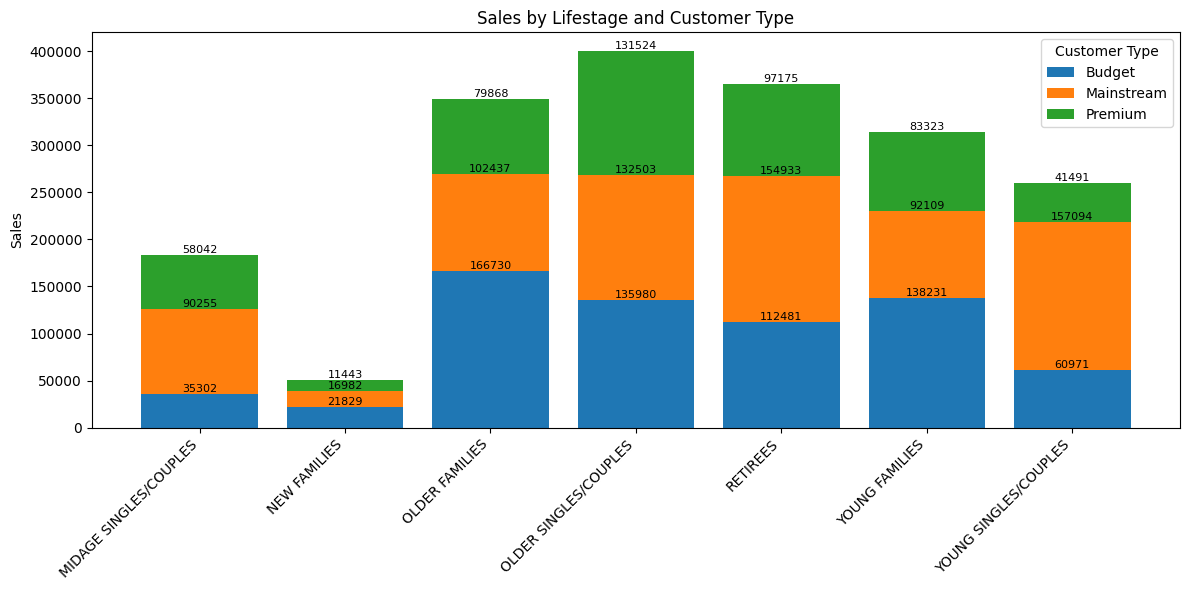

In [221]:
labels = sale_pivot.index
budget = sale_pivot['Budget']
mainstream = sale_pivot['Mainstream']
premium = sale_pivot['Premium']
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(12, 6))


bar1 = ax.bar(x, budget, label='Budget')
bar2 = ax.bar(x, mainstream, bottom=budget, label='Mainstream')
bar3 = ax.bar(x, premium, bottom=budget + mainstream, label='Premium')


def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + bar.get_y() - 10,
            s=f'{height:.0f}',
            ha='center', va='bottom', fontsize=8, color='black'
        )

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)


ax.set_ylabel('Sales')
ax.set_title('Sales by Lifestage and Premium Type')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend(title='Customer Type')

plt.tight_layout()
plt.show()

Above is the stacked bar graph of sales across lifestage and premium:


1.   In mainstream young singles/couples have highest sales
2.   New families have lowest sales across each premium group



In [222]:
sale_pivot_q = sale.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='quantity per customer')
sale_pivot_q.reset_index()

PREMIUM_CUSTOMER,LIFESTAGE,Budget,Mainstream,Premium
0,MIDAGE SINGLES/COUPLES,6.0,7.0,6.0
1,NEW FAMILIES,5.0,5.0,5.0
2,OLDER FAMILIES,10.0,10.0,9.0
3,OLDER SINGLES/COUPLES,7.0,7.0,7.0
4,RETIREES,6.0,6.0,6.0
5,YOUNG FAMILIES,9.0,9.0,9.0
6,YOUNG SINGLES/COUPLES,4.0,5.0,4.0


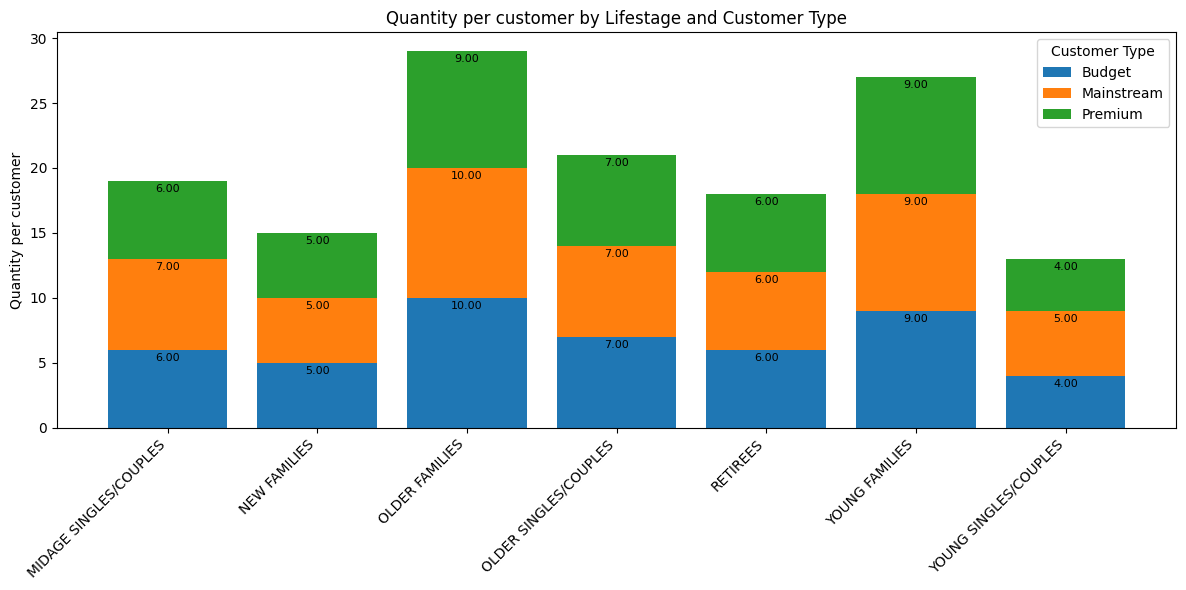

In [223]:
labels=sale_pivot_q.index
budget=sale_pivot_q['Budget']
mainstream=sale_pivot_q['Mainstream']
premium=sale_pivot_q['Premium']
x=np.arange(len(labels))

fig, ax = plt.subplots(figsize=(12, 6))

bar1=ax.bar(x,budget,label='Budget')
bar2=ax.bar(x,mainstream,bottom=budget,label='Mainstream')
bar3=ax.bar(x,premium,bottom=budget+mainstream,label='Premium')

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + bar.get_y() - 1,
            s=f'{height:.2f}',
            ha='center', va='bottom', fontsize=8, color='black'
        )

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)

ax.set_ylabel('Quantity per customer')
ax.set_title('Quantity per customer by Lifestage and Customer Type')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend(title='Customer Type')

plt.tight_layout()
plt.show()

In [181]:
transaction['month']=transaction['DATE'].dt.month
transaction['month_name']=transaction['DATE'].dt.month_name()
transaction['year']=transaction['DATE'].dt.year
transaction['quarter']=transaction['DATE'].dt.quarter
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Price,LIFESTAGE,PREMIUM_CUSTOMER,month,month_name,year,quarter
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,3.0,YOUNG SINGLES/COUPLES,Premium,10,October,2018,4
1,2018-09-16,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,2.7,YOUNG SINGLES/COUPLES,Mainstream,9,September,2018,3
2,2019-03-07,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,3.6,YOUNG FAMILIES,Budget,3,March,2019,1
3,2019-03-08,1,1003,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,3.0,YOUNG FAMILIES,Budget,3,March,2019,1
4,2018-11-02,1,1004,5,96,WW Original Stacked Chips 160g,1,1.9,1.9,OLDER SINGLES/COUPLES,Mainstream,11,November,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263120,2018-09-26,272,272392,270206,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,4.2,MIDAGE SINGLES/COUPLES,Premium,9,September,2018,3
263121,2018-09-29,272,272392,270207,75,Cobs Popd Sea Salt Chips 110g,2,7.6,3.8,MIDAGE SINGLES/COUPLES,Premium,9,September,2018,3
263122,2018-10-31,272,272392,270208,81,Pringles Original Crisps 134g,2,7.4,3.7,MIDAGE SINGLES/COUPLES,Premium,10,October,2018,4
263123,2019-02-17,272,272392,270209,78,Thins Chips Salt & Vinegar 175g,2,6.6,3.3,MIDAGE SINGLES/COUPLES,Premium,2,February,2019,1


In [226]:
month_sales=transaction.groupby(by=['year','month','month_name'],as_index=False).agg(sales=pd.NamedAgg(column='TOT_SALES', aggfunc='sum'))
month_sales['year_month'] = month_sales['year'].astype(str) + '-' + month_sales['month_name']
month_sales.sort_values(by=['year','month'],ascending=True,inplace=True)
month_sales.drop(columns=['year', 'month', 'month_name'],inplace=True)
month_sales.set_index('year_month',inplace=True)
month_sales['mom']=((month_sales['sales'].pct_change())*100).round(0)
month_sales

,sales,mom
year_month,,
2018-July,164363.40,NaN
2018-August,157100.45,-4.0
2018-September,159443.00,1.0
2018-October,163430.40,3.0
2018-November,159177.20,-3.0
2018-December,166836.40,5.0
2019-January,161437.90,-3.0
2019-February,149593.30,-7.0
2019-March,165168.70,10.0


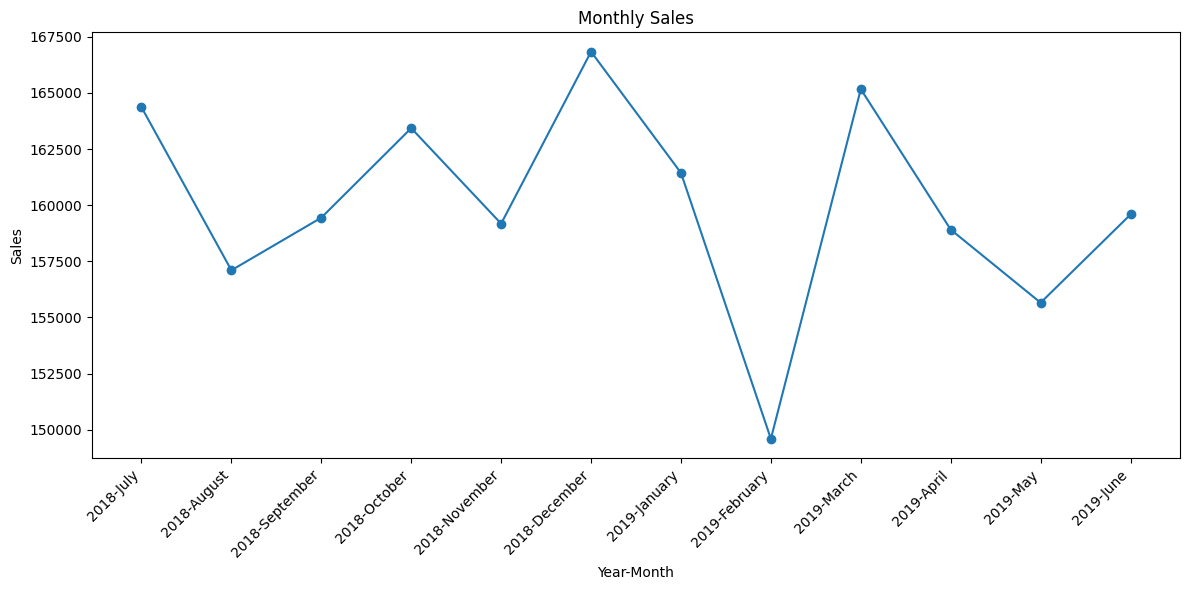

In [227]:
plt.figure(figsize=(12, 6))
plt.plot(month_sales.index, month_sales['sales'], marker='o')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Above is line graph showing sales of chips each month for 1 year:


1.   Highest sale was recorded in December 2018 and lowest sale was recoreded in February 2019



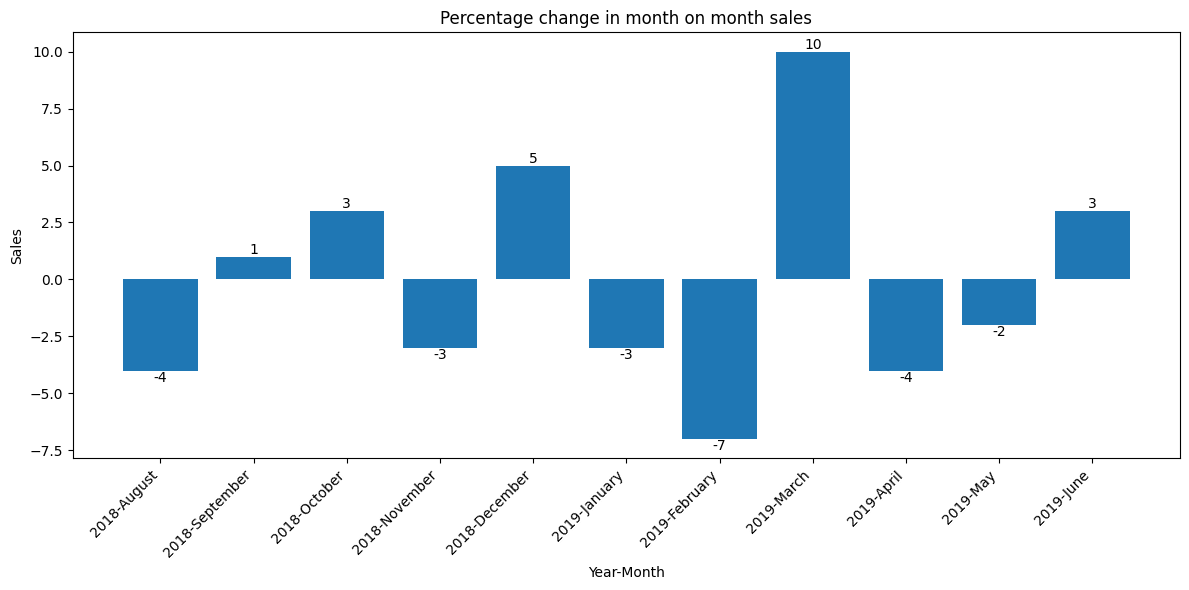

In [229]:
plt.figure(figsize=(12, 6))
bars=plt.bar(month_sales.index, month_sales['mom'])
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.title('Percentage change in month on month sales')
plt.xticks(rotation=45, ha='right')
plt.bar_label(bars)
plt.tight_layout()
plt.show()

Above is bar gragh depicting month on month(m-o-m) sales percentage for over one year:


1.   Highest percentage m-o-m sales was recorded in March 2019 of 10%
2.   Out 11 months, 6 month recorded decrease in m-o-m sales



In [185]:
quarter_sales=transaction.groupby(by=['year','quarter'],as_index=False).agg(sales=pd.NamedAgg(column='TOT_SALES', aggfunc='sum'))
quarter_sales.sort_values(by=['year','quarter'],ascending=True,inplace=True)
quarter_sales['year-quarter']=quarter_sales['year'].astype(str)+ '-Q' +quarter_sales['quarter'].astype(str)
quarter_sales.drop(columns=['year','quarter'],inplace=True)
quarter_sales.set_index('year-quarter',inplace=True)
quarter_sales['qoq']=quarter_sales['sales'].pct_change()
quarter_sales

,sales,qoq
year-quarter,,
2018-Q3,480906.85,NaN
2018-Q4,489444.00,0.017752
2019-Q1,476199.90,-0.027059
2019-Q2,474152.50,-0.004299


In [186]:
best_seller=transaction.groupby(by=['PROD_NAME'],as_index=False).agg(sales=pd.NamedAgg(column='TOT_SALES', aggfunc='sum'),
                                                                        quantity=pd.NamedAgg(column='PROD_QTY', aggfunc='sum'))
best_seller.sort_values(by=['sales','quantity'],ascending=False,inplace=True)
best_seller=best_seller.head(5)
best_seller

,PROD_NAME,sales,quantity
11,Dorito Corn Chp Supreme 380g,38762.75,6064
86,Smiths Crnkle Chip Orgnl Big Bag 380g,36208.30,6137
77,Smiths Crinkle Chips Salt & Vinegar 330g,34570.50,6065
33,Kettle Mozzarella Basil & Pesto 175g,34273.80,6347
6,Cheezels Cheese 330g,34068.90,5977


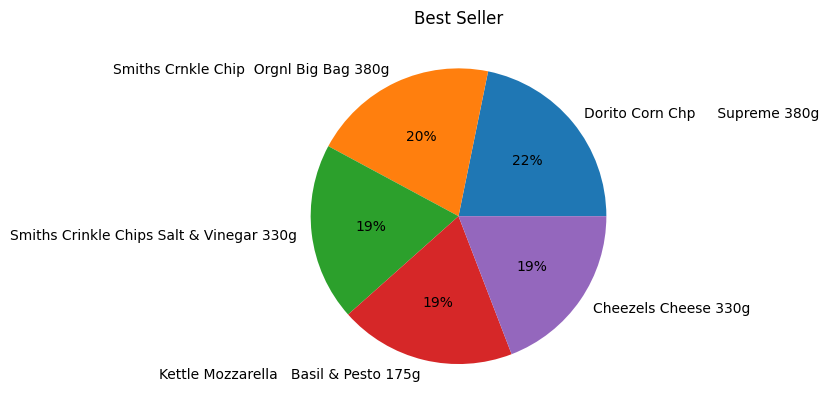

In [230]:
plt.pie(best_seller['sales'],labels=best_seller['PROD_NAME'],autopct='%1.0f%%')
plt.title('Best Seller')
plt.show()

Above pie chart of percentage contribution of top 5 best seller chips:


1.   Smiths brand has 2 bestseller chips among top 5 best seller chips



Overall strategic moves for next year

1.   **Target customer** - Target  **mainstream customer** and **older lisfestage** including older singles/couples, older families, retirees including and **younger lifestage** including young families and young singles/couples will benefit more as all either have high sales, high RPR, purchase lager quantity of chips or costly/expensive chips, or have large unique customer.



2.  **Target Month** - **December** has recorded highest sales. Make sure to have enough supply during December. Have enough supply during end **6 month of end of the year** where positive month on month sales weren recoreded.



3.  **Chips brand** - From top five best seller chips customer likes **Smiths brand** chips the most.

